# Clustering the players 

##### Copyright 2022, Group 4



Scrapping data from basketball reference:

Install the library packages:

In [ ]:
install.packages('janitor')
#library(prismatic)
#library(ggrepel)
library(tidyverse)
library(rvest)
library(dplyr)
library(janitor)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Scrap the players data from the web:

In [ ]:

#Creating an empty data fram
Full_table <- data.frame()

#Scrap the player data from web and store it in Full_table for years 1996 to 2022
for (SeasonYear in 1996:2022) {
#SeasonYear=1996  
      #Store the url
      url <- paste0("https://www.basketball-reference.com/leagues/NBA_",SeasonYear,"_advanced.html")
      url
      #Scrape the season player data from the web page
      Season_table <- read_html(url, as.data.frame=T, stringAsFactors=TRUE)
      Season_table
      
      #Transform the html format to table 
      prem <- Season_table%>%
              html_nodes("table")%>%
              .[[1]]%>%
              html_table(fill=T)
      
      #Adding a column to indicate the year for scraped observation.
      prem$Year<-rep(SeasonYear,times=nrow(prem))
      
      #Append prem to Full_table
      Full_table <- rbind(Full_table,prem)
      
      #Remove the temporary tables prem and Season_table
      rm(prem)
      rm(Season_table)
      
}

head(Full_table)

Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,⋯,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>
1,Mahmoud Abdul-Rauf,PG,26,DEN,57,2029,18.6,.535,.324,⋯,4.4,1.1,5.5,.131,NA,3.5,-1.6,1.9,1.9,1996
2,Michael Adams,PG,33,CHH,21,329,16.1,.579,.494,⋯,0.6,0.2,0.8,.117,NA,1.6,1.2,2.8,0.4,1996
3,Rafael Addison,SF,31,CHH,53,516,9.6,.489,.055,⋯,0.0,0.2,0.2,.019,NA,-3.9,-1.0,-4.9,-0.4,1996
4,Cory Alexander,PG,22,SAS,60,560,8.7,.506,.426,⋯,-0.5,0.7,0.2,.021,NA,-4.2,-0.1,-4.3,-0.3,1996
5,Jerome Allen,SG,23,MIN,41,362,7.8,.447,.314,⋯,-0.5,0.3,-0.3,-0.033,NA,-4.3,-0.2,-4.6,-0.2,1996
6,Derrick Alston,C,23,PHI,73,1614,11.8,.518,.008,⋯,1.0,0.8,1.7,.052,NA,-2.5,-0.2,-2.8,-0.3,1996


Getting a backup from data:

In [ ]:
#Getting a copy of scrapped data
Full_table_not_cleaned <- Full_table
#Restoring the copy
#Full_table <- Full_table_not_cleaned
head(Full_table)
dim(Full_table)

Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,⋯,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>
1,Mahmoud Abdul-Rauf,PG,26,DEN,57,2029,18.6,.535,.324,⋯,4.4,1.1,5.5,.131,NA,3.5,-1.6,1.9,1.9,1996
2,Michael Adams,PG,33,CHH,21,329,16.1,.579,.494,⋯,0.6,0.2,0.8,.117,NA,1.6,1.2,2.8,0.4,1996
3,Rafael Addison,SF,31,CHH,53,516,9.6,.489,.055,⋯,0.0,0.2,0.2,.019,NA,-3.9,-1.0,-4.9,-0.4,1996
4,Cory Alexander,PG,22,SAS,60,560,8.7,.506,.426,⋯,-0.5,0.7,0.2,.021,NA,-4.2,-0.1,-4.3,-0.3,1996
5,Jerome Allen,SG,23,MIN,41,362,7.8,.447,.314,⋯,-0.5,0.3,-0.3,-0.033,NA,-4.3,-0.2,-4.6,-0.2,1996
6,Derrick Alston,C,23,PHI,73,1614,11.8,.518,.008,⋯,1.0,0.8,1.7,.052,NA,-2.5,-0.2,-2.8,-0.3,1996


[1] 16539    30

Data Cleaning and Preprocessing:

In [ ]:
#Remove the columns with NA values for all rows
Full_table <- Full_table[,colSums(is.na(Full_table))<nrow(Full_table)]

#Remove rows with title value
Full_table <- filter(Full_table, Full_table$Player!="Player")

#Fixing the variable types

Full_table$Rk <- as.numeric(Full_table$Rk)
Full_table$Age <- as.numeric(Full_table$Age)
Full_table$G <- as.numeric(Full_table$G)
Full_table$MP <- as.numeric(Full_table$MP)
Full_table$PER <- as.numeric(Full_table$PER)
Full_table$`TS%` <- as.numeric(Full_table$`TS%`)
Full_table$`3PAr` <- as.numeric(Full_table$`3PAr`)
Full_table$FTr <- as.numeric(Full_table$FTr)
Full_table$`ORB%` <- as.numeric(Full_table$`ORB%`)
Full_table$`DRB%` <- as.numeric(Full_table$`DRB%`)
Full_table$`TRB%` <- as.numeric(Full_table$`TRB%`)
Full_table$`AST%` <- as.numeric(Full_table$`AST%`)
Full_table$`STL%` <- as.numeric(Full_table$`STL%`)
Full_table$`BLK%` <- as.numeric(Full_table$`BLK%`)
Full_table$`TOV%` <- as.numeric(Full_table$`TOV%`)
Full_table$`USG%` <- as.numeric(Full_table$`USG%`)
Full_table$OWS <- as.numeric(Full_table$OWS)
Full_table$DWS <- as.numeric(Full_table$DWS)
Full_table$WS <- as.numeric(Full_table$WS)
Full_table$`WS/48` <- as.numeric(Full_table$`WS/48`)
Full_table$OBPM <- as.numeric(Full_table$OBPM)
Full_table$DBPM <- as.numeric(Full_table$DBPM)
Full_table$BPM <- as.numeric(Full_table$BPM)
Full_table$VORP <- as.numeric(Full_table$VORP)
Full_table$Year <- as.numeric(Full_table$Year)


#Remove the rows that has any NA value
Full_table <- Full_table %>% drop_na()

head(Full_table)
dim(Full_table)

Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,⋯,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mahmoud Abdul-Rauf,PG,26,DEN,57,2029,18.6,0.535,0.324,⋯,25.1,4.4,1.1,5.5,0.131,3.5,-1.6,1.9,1.9,1996
2,Michael Adams,PG,33,CHH,21,329,16.1,0.579,0.494,⋯,17.0,0.6,0.2,0.8,0.117,1.6,1.2,2.8,0.4,1996
3,Rafael Addison,SF,31,CHH,53,516,9.6,0.489,0.055,⋯,17.7,0.0,0.2,0.2,0.019,-3.9,-1.0,-4.9,-0.4,1996
4,Cory Alexander,PG,22,SAS,60,560,8.7,0.506,0.426,⋯,18.8,-0.5,0.7,0.2,0.021,-4.2,-0.1,-4.3,-0.3,1996
5,Jerome Allen,SG,23,MIN,41,362,7.8,0.447,0.314,⋯,19.0,-0.5,0.3,-0.3,-0.033,-4.3,-0.2,-4.6,-0.2,1996
6,Derrick Alston,C,23,PHI,73,1614,11.8,0.518,0.008,⋯,13.7,1.0,0.8,1.7,0.052,-2.5,-0.2,-2.8,-0.3,1996


[1] 15821    28

One-hot Encoding the Pos Variable

In [ ]:
#One-hot encoding Pos
Full_table <- pivot_wider(Full_table, names_from =Pos, values_from = Pos,values_fn = list(Pos=~1),values_fill = list(Pos=0))
head(Full_table)
dim(Full_table)
str(Full_table)

Rk,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,⋯,SG-PG,SF-SG,SF-PF,PF-SF,C-PF,PG-SG,PG-SF,SG-PF,SF-C,SG-PG-SF
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mahmoud Abdul-Rauf,26,DEN,57,2029,18.6,0.535,0.324,0.164,⋯,0,0,0,0,0,0,0,0,0,0
2,Michael Adams,33,CHH,21,329,16.1,0.579,0.494,0.422,⋯,0,0,0,0,0,0,0,0,0,0
3,Rafael Addison,31,CHH,53,516,9.6,0.489,0.055,0.133,⋯,0,0,0,0,0,0,0,0,0,0
4,Cory Alexander,22,SAS,60,560,8.7,0.506,0.426,0.161,⋯,0,0,0,0,0,0,0,0,0,0
5,Jerome Allen,23,MIN,41,362,7.8,0.447,0.314,0.343,⋯,0,0,0,0,0,0,0,0,0,0
6,Derrick Alston,23,PHI,73,1614,11.8,0.518,0.008,0.289,⋯,0,0,0,0,0,0,0,0,0,0


[1] 15821    44

tibble [15,821 × 44] (S3: tbl_df/tbl/data.frame)
 $ Rk      : num [1:15821] 1 2 3 4 5 6 7 8 9 10 ...
 $ Player  : chr [1:15821] "Mahmoud Abdul-Rauf" "Michael Adams" "Rafael Addison" "Cory Alexander" ...
 $ Age     : num [1:15821] 26 33 31 22 23 23 25 24 31 25 ...
 $ Tm      : chr [1:15821] "DEN" "CHH" "CHH" "SAS" ...
 $ G       : num [1:15821] 57 21 53 60 41 73 28 54 46 69 ...
 $ MP      : num [1:15821] 2029 329 516 560 362 ...
 $ PER     : num [1:15821] 18.6 16.1 9.6 8.7 7.8 11.8 3.1 11.8 7.7 19.5 ...
 $ TS%     : num [1:15821] 0.535 0.579 0.489 0.506 0.447 0.518 0.456 0.534 0.466 0.534 ...
 $ 3PAr    : num [1:15821] 0.324 0.494 0.055 0.426 0.314 0.008 0 0.004 0.021 0.307 ...
 $ FTr     : num [1:15821] 0.164 0.422 0.133 0.161 0.343 0.289 0.471 0.591 0.532 0.405 ...
 $ ORB%    : num [1:15821] 1.5 1.8 5.8 1.9 1.7 8.8 4.8 11.7 9.8 3 ...
 $ DRB%    : num [1:15821] 6.4 6.4 15.6 6.3 6.6 12.9 14.8 20.8 22.1 7.1 ...
 $ TRB%    : num [1:15821] 3.9 4.1 10.6 4.2 4.1 10.8 9.7 16.1 16.2 5 ...
 $ A

Removing Redundant Positions and Storing their Values in the Main Position Categories:


In [ ]:
Full_table$SG <- Full_table$`SG-SF` + Full_table$SG
Full_table$SF <- Full_table$`SG-SF` + Full_table$SF
Full_table$PF <- Full_table$`PF-C` + Full_table$PF
Full_table$C <- Full_table$`PF-C` + Full_table$C
Full_table$SG <- Full_table$`SG-PG` + Full_table$SG
Full_table$PG <- Full_table$`SG-PG` + Full_table$PG
Full_table$SF <- Full_table$`SF-SG` + Full_table$SF
Full_table$SG <- Full_table$`SF-SG` + Full_table$SG
Full_table$SF <- Full_table$`SF-PF` + Full_table$SF
Full_table$PF <- Full_table$`SF-PF` + Full_table$PF
Full_table$SF <- Full_table$`PF-SF` + Full_table$SF
Full_table$PF <- Full_table$`PF-SF` + Full_table$PF
Full_table$C <- Full_table$`C-PF` + Full_table$C
Full_table$PF <- Full_table$`C-PF` + Full_table$PF
Full_table$PG <- Full_table$`PG-SG` + Full_table$PG
Full_table$SG <- Full_table$`PG-SG` + Full_table$SG
Full_table$PG <- Full_table$`PG-SF` + Full_table$PG
Full_table$SF <- Full_table$`PG-SF` + Full_table$SF
Full_table$PF <- Full_table$`SG-PF` + Full_table$PF
Full_table$SG <- Full_table$`SG-PF` + Full_table$SG
Full_table$SF <- Full_table$`SF-C` + Full_table$SF
Full_table$C <- Full_table$`SF-C` + Full_table$C
Full_table$SG <- Full_table$`SG-PG-SF` + Full_table$SG
Full_table$PG <- Full_table$`SG-PG-SF` + Full_table$PG
Full_table$SF <- Full_table$`SG-PG-SF` + Full_table$SF

Full_table = select(Full_table, -c(33,34,35,36,37,38,39,40,41,42,43,44))

head(Full_table)
dim(Full_table)

Rk,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,⋯,OBPM,DBPM,BPM,VORP,Year,PG,SF,SG,C,PF
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mahmoud Abdul-Rauf,26,DEN,57,2029,18.6,0.535,0.324,0.164,⋯,3.5,-1.6,1.9,1.9,1996,1,0,0,0,0
2,Michael Adams,33,CHH,21,329,16.1,0.579,0.494,0.422,⋯,1.6,1.2,2.8,0.4,1996,1,0,0,0,0
3,Rafael Addison,31,CHH,53,516,9.6,0.489,0.055,0.133,⋯,-3.9,-1.0,-4.9,-0.4,1996,0,1,0,0,0
4,Cory Alexander,22,SAS,60,560,8.7,0.506,0.426,0.161,⋯,-4.2,-0.1,-4.3,-0.3,1996,1,0,0,0,0
5,Jerome Allen,23,MIN,41,362,7.8,0.447,0.314,0.343,⋯,-4.3,-0.2,-4.6,-0.2,1996,0,0,1,0,0
6,Derrick Alston,23,PHI,73,1614,11.8,0.518,0.008,0.289,⋯,-2.5,-0.2,-2.8,-0.3,1996,0,0,0,1,0


[1] 15821    32

Grouping by the players name

In [ ]:
Full_table_Grouped <- Full_table%>%group_by(Full_table$Year, Full_table$Player)%>%summarise_all(.funs = c(mean="mean"))

Streaming output truncated to the last 5000 lines.
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(Tm):
“argument is not numeric or logi

Removing extra columns

In [ ]:
Full_table_Grouped_Cleaned = subset(Full_table, select = -c(Year, Player, Tm))

Finding the k Using Elbow Method

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


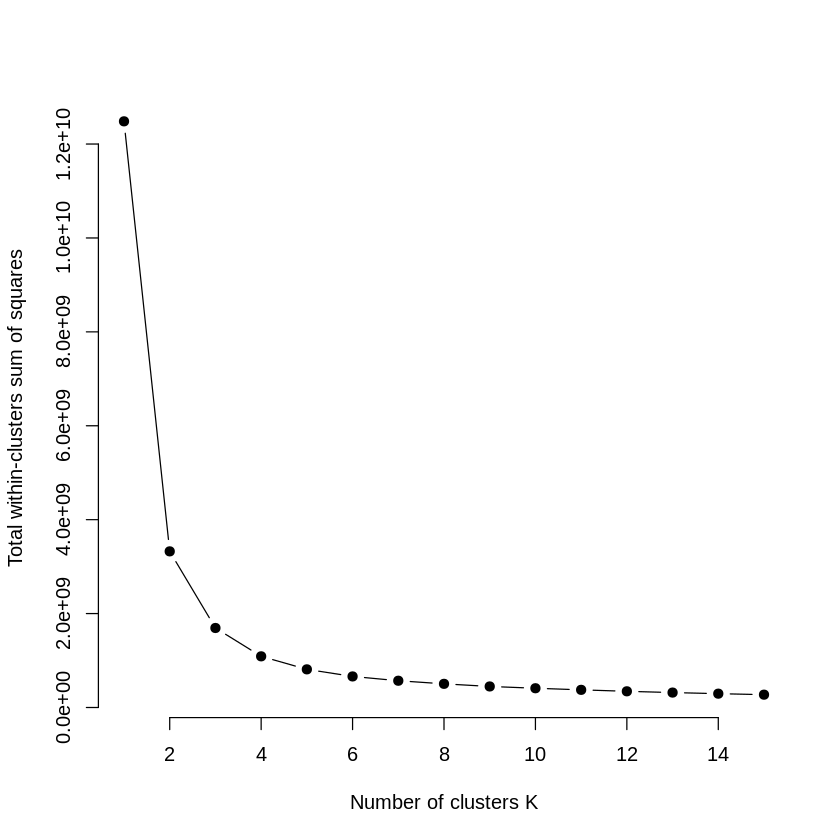

In [ ]:
set.seed(123)

Full_table_Grouped_Cleaned <- na.omit(Full_table_Grouped_Cleaned)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(Full_table_Grouped_Cleaned, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

Selecting important features

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,⋯,WS/48,OBPM,DBPM,BPM,VORP,PG,SF,SG,C,PF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,57,2029,18.6,0.535,0.324,0.164,1.5,6.4,⋯,0.131,3.5,-1.6,1.9,1.9,1,0,0,0,0
2,33,21,329,16.1,0.579,0.494,0.422,1.8,6.4,⋯,0.117,1.6,1.2,2.8,0.4,1,0,0,0,0
3,31,53,516,9.6,0.489,0.055,0.133,5.8,15.6,⋯,0.019,-3.9,-1.0,-4.9,-0.4,0,1,0,0,0
4,22,60,560,8.7,0.506,0.426,0.161,1.9,6.3,⋯,0.021,-4.2,-0.1,-4.3,-0.3,1,0,0,0,0
5,23,41,362,7.8,0.447,0.314,0.343,1.7,6.6,⋯,-0.033,-4.3,-0.2,-4.6,-0.2,0,0,1,0,0
6,23,73,1614,11.8,0.518,0.008,0.289,8.8,12.9,⋯,0.052,-2.5,-0.2,-2.8,-0.3,0,0,0,1,0


[1] 15821    29

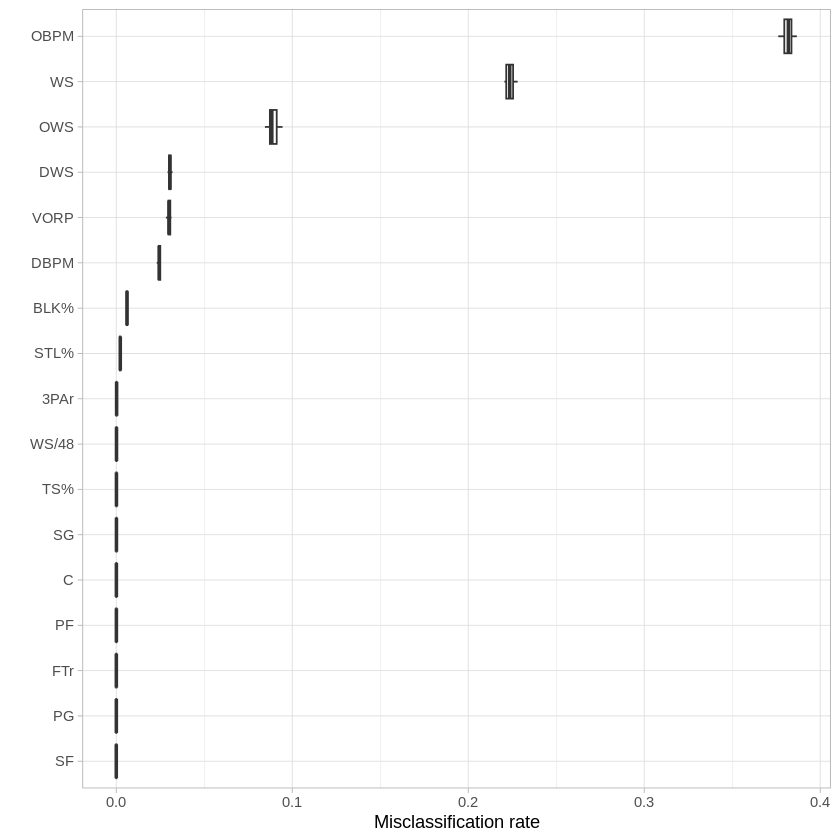

In [ ]:
#Dropping the most important feature to see the next important feature in the graph.
df = subset(Full_table_Grouped_Cleaned, select = -c(MP))
df = subset(df, select = -c(Rk))
df = subset(df, select = -c(G))
df = subset(df, select = -c(`AST%`))
df = subset(df, select = -c(`DRB%`))
df = subset(df, select = -c(PER))
df = subset(df, select = -c(`TRB%`))
df = subset(df, select = -c(`ORB%`))
df = subset(df, select = -c(`Age`))
df = subset(df, select = -c(`USG%`))
df = subset(df, select = -c(`TOV%`))
df = subset(df, select = -c(`BPM`))
install.packages('FeatureImpCluster')
install.packages('flexclust')
library(FeatureImpCluster)
library(flexclust)
#> Loading required package: grid
#> Loading required package: lattice
#> Loading required package: modeltools
#> Loading required package: stats4
set.seed(123)
res <- kcca(df,k=4)
set.seed(123)
FeatureImp_res <- FeatureImpCluster(res,as.data.table(df))
plot(FeatureImp_res)

head(Full_table_Grouped_Cleaned)
dim(Full_table_Grouped_Cleaned)

Kmean

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



MP,Rk,G,AST%,DRB%,PER,TRB%
1.0972323,-1.700036,0.4235007,2.2844486,-1.2127450,0.9444956,-1.2263611
-0.8421001,-1.692903,-0.9593154,1.8326184,-1.2127450,0.5587204,-1.1861653
-0.6287735,-1.685769,0.2698545,-0.3950093,0.1911905,-0.4442953,0.1202001
-0.5785790,-1.678636,0.5387354,1.9587106,-1.2280051,-0.5831743,-1.1660673
-0.8044542,-1.671503,-0.1910842,0.8238814,-1.1822246,-0.7220534,-1.1861653
0.6238070,-1.664369,1.0380856,-0.6787166,-0.2208340,-0.1048130,0.1603960


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 791050)”


List of 9
 $ cluster     : int [1:15821] 2 1 1 2 1 2 1 3 3 2 ...
 $ centers     : num [1:3, 1:7] -0.8359 0.9396 -0.0523 0.0383 -0.0674 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:7] "MP" "Rk" "G" "AST%" ...
 $ totss       : num 110740
 $ withinss    : num [1:3] 24949 21513 23118
 $ tot.withinss: num 69579
 $ betweenss   : num 41161
 $ size        : int [1:3] 5767 5390 4664
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 3 clusters of sizes 5767, 5390, 4664

Cluster means:
           MP          Rk          G        AST%       DRB%        PER
1 -0.83588107  0.03828466 -0.8739068 -0.07209904 -0.5190067 -0.5942707
2  0.93959292 -0.06744230  0.8686900  0.55598433 -0.4103999  0.3357552
3 -0.05228981  0.03060171  0.0766684 -0.55337915  1.1160306  0.3467921
        TRB%
1 -0.4942208
2 -0.4930887
3  1.1809433

Clustering vector:
    [1] 2 1 1 2 1 2 1 3 3 2 2 2 2 2 2 1 2 2 1 2 2 2 3 2 1 3 2 2 2 1 3 3 3 1 1 2
   [37] 2 2 3 1 3 1 2 1 3 3 3 3 2 1 2 2 2 2 1 2 2 3 2 1 1 3 1 1 3 3 2 2 1 2 3 2
   [73] 2 2 3 1 2 2 1 1 1 1 1 3 2 2 1 2 1 2 3 1 3 2 3 2 1 1 1 1 1 3 3 3 2 3 1 2
  [109] 1 2 1 2 2 3 1 3 2 1 2 2 1 3 2 1 2 2 3 2 2 1 1 1 2 2 2 2 2 3 1 3 1 3 1 2
  [145] 2 1 1 1 2 1 3 2 2 1 1 2 3 3 3 1 3 2 2 1 2 1 1 1 1 1 1 1 1 1 3 1 2 1 1 1
  [181] 1 1 2 3 3 2 1 3 1 3 1 3 1 2 2 2 2 2 2 2 3 3 3 2 1 3 1 1 2 3 1 1 1 2 2 2
  [217] 3 2 2 2 1 2 2 1 2 1 2 3 2 2 2 3 2 3 2 1 3 3 2 2 2 2 2 1 2 1 3 3 2 2 3 3
  [253]

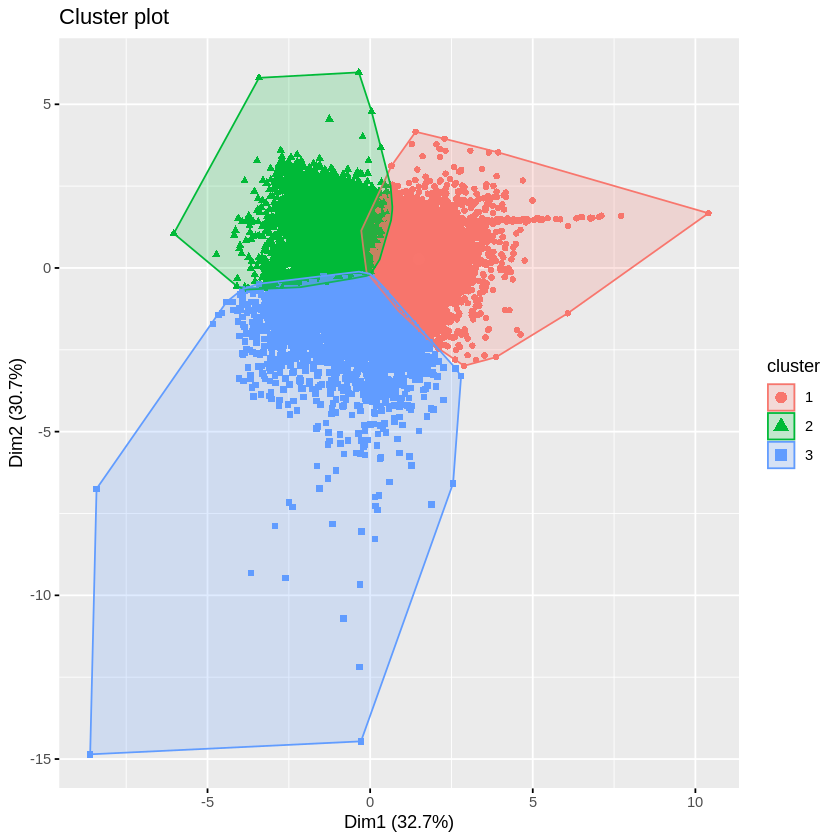

In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
install.packages('factoextra')
library(factoextra) # clustering algorithms & visualization

#Creating a data frame with the important features:

df = subset(Full_table_Grouped_Cleaned, select = c(MP, Rk, G, `AST%`, `DRB%`, PER, `TRB%`))

#df = subset(Full_table, select = c(MP_mean, Rk_mean, G_mean, `AST%_mean`, `DRB%_mean`, PER_mean, `TRB%_mean`, `ORB%_mean`, `Age_mean`, `USG%_mean`, `TOV%_mean`, `BPM_mean`, `OBPM_mean`, `WS_mean`, `OWS_mean`))

# Compute k-means with k = 3

#remove any missing value that might be present in the data
df <- na.omit(df)
#standardizing the data using the R function
df <- scale(df)
head(df)
#Visualizing a distance matrix
k2 <- kmeans(df, centers = 3, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df, geom = c("point"))

Adding Cluster and Player's Name Column

In [ ]:
df2 <- data.frame()
df2 = subset(Full_table, select = c(Year, Tm, Player))
df2$cluster <- k2$cluster


Merging the tables:

In [ ]:
head(df2)

Year,Tm,Player,cluster
<dbl>,<chr>,<chr>,<int>
1996,DEN,Mahmoud Abdul-Rauf,2
1996,CHH,Michael Adams,1
1996,CHH,Rafael Addison,1
1996,SAS,Cory Alexander,2
1996,MIN,Jerome Allen,1
1996,PHI,Derrick Alston,2


In [ ]:
Full_table_merged <- merge(x = df2, y = Full_table, by = c("Year", "Tm", "Player"))
#df3 = subset(Full_table_merged, select = -c(`Full_table$Year`, `Full_table$Player`))
head(Full_table_merged)
nrow(Full_table_merged)

,Year,Tm,Player,cluster,Rk,Age,G,MP,PER,TS%,⋯,WS/48,OBPM,DBPM,BPM,VORP,PG,SF,SG,C,PF
,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1996,ATL,Alan Henderson,3,162,23,79,1416,12.9,0.482,⋯,0.069,-3.2,-0.9,-4.1,-0.8,0,0,0,0,1
2,1996,ATL,Andrew Lang,3,207,29,51,1815,12.4,0.490,⋯,0.058,-2.5,-0.4,-2.9,-0.4,0,0,0,1,0
3,1996,ATL,Christian Laettner,3,206,26,30,977,17.2,0.556,⋯,0.125,-0.6,0.2,-0.3,0.4,0,0,0,1,0
4,1996,ATL,Craig Ehlo,2,113,34,79,1758,13.7,0.526,⋯,0.090,-0.3,0.4,0.2,1.0,0,0,1,0,0
5,1996,ATL,Donnie Boyce,1,38,22,8,41,17.7,0.485,⋯,0.004,1.6,-1.0,0.6,0.0,0,0,1,0,0
6,1996,ATL,Grant Long,3,216,29,82,3008,16.2,0.546,⋯,0.134,0.6,0.2,0.7,2.1,0,0,0,0,1


[1] 15821

Save the file as csv:

In [ ]:
write.csv(Full_table_merged, "players.csv")

#Some visualizations comparing the clusters:

###Using linear regression, findwhich variables are significant:

In [ ]:
lmodel1 <- lm(cluster ~.,data= Full_table_merged)
summary(lmodel1)


Call:
lm(formula = cluster ~ ., data = Full_table_merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3241 -0.2354  0.0000  0.2312  1.5917 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6.891e+00  1.435e+01   0.480 0.631039    
Year                           -3.354e-03  7.303e-03  -0.459 0.646065    
TmBOS                          -4.417e-02  3.645e-02  -1.212 0.225549    
TmBRK                           5.406e-02  4.523e-02   1.195 0.232057    
TmCHA                          -6.760e-02  4.691e-02  -1.441 0.149609    
TmCHH                          -4.731e-02  5.586e-02  -0.847 0.397025    
TmCHI                           2.233e-02  3.663e-02   0.610 0.542110    
TmCHO                           4.305e-02  5.980e-02   0.720 0.471646    
TmCLE                          -3.848e-02  3.586e-02  -1.073 0.283261    
TmDAL                           2.439e-02  3.577e-02   0.682 0.495466    
TmDEN             

###Change cluster data type to numeric:

In [ ]:
Full_table_merged$cluster <- as.numeric(Full_table_merged$cluster)

###Boxplots:

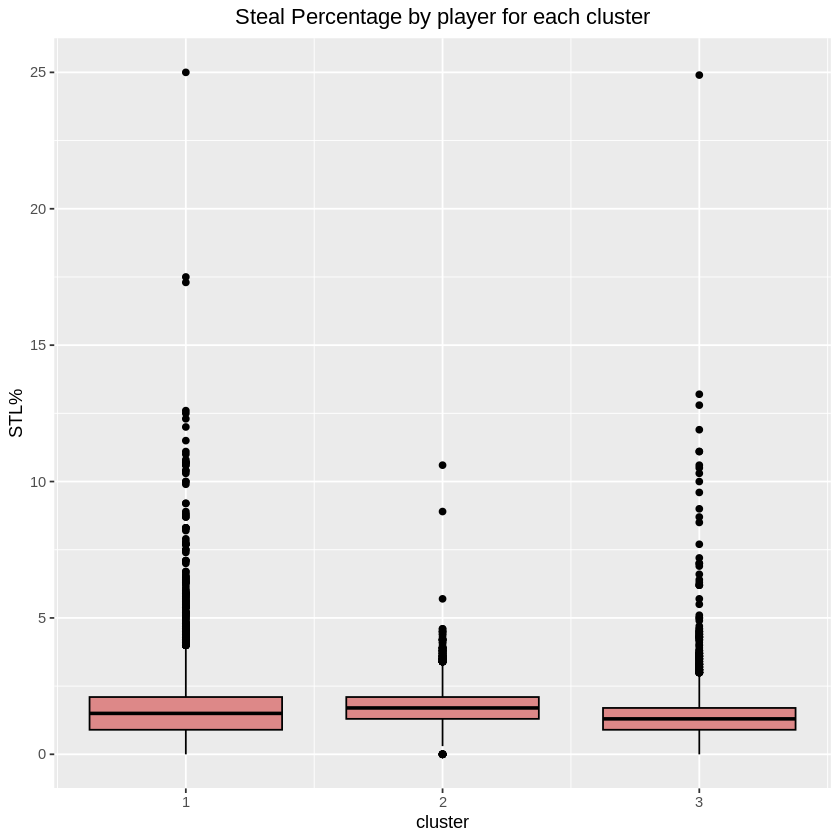

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `STL%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Steal Percentage by player for each cluster')

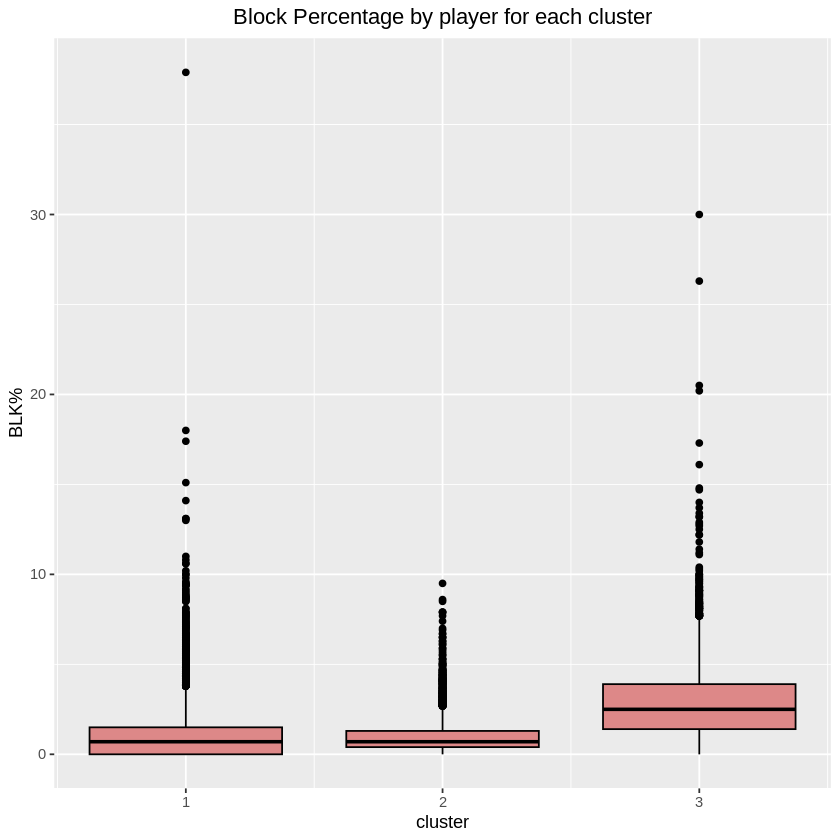

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `BLK%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Block Percentage by player for each cluster')

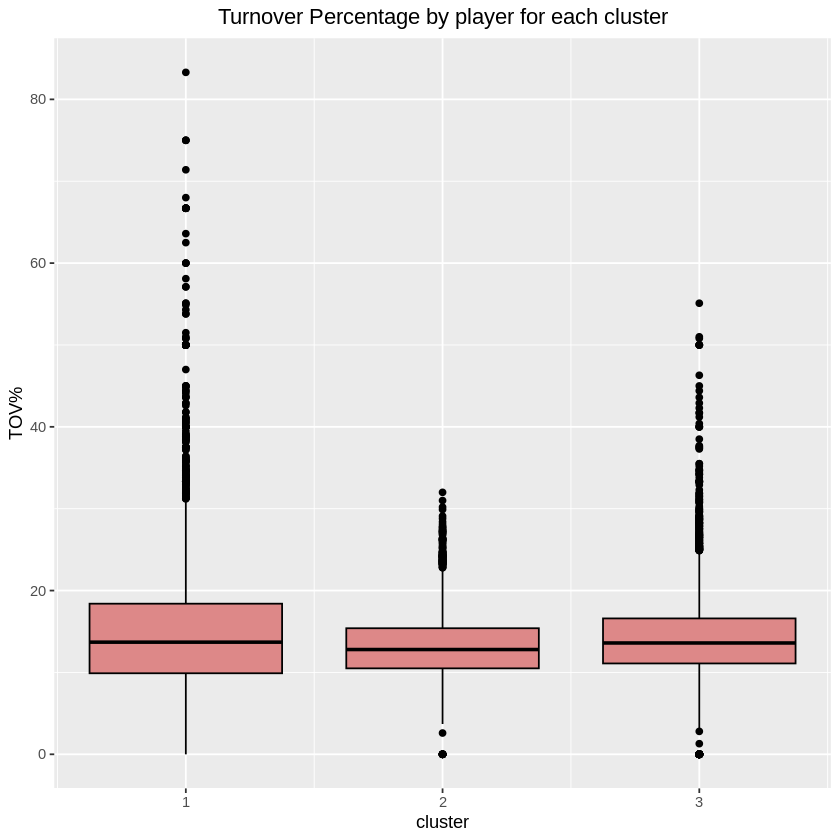

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `TOV%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Turnover Percentage by player for each cluster')

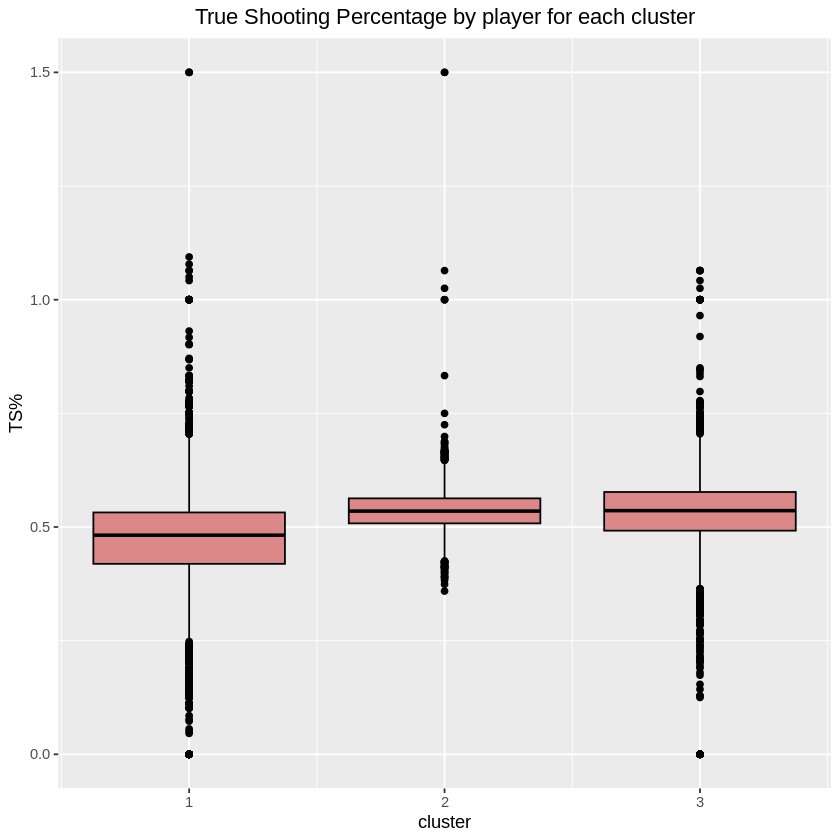

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `TS%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('True Shooting Percentage by player for each cluster')

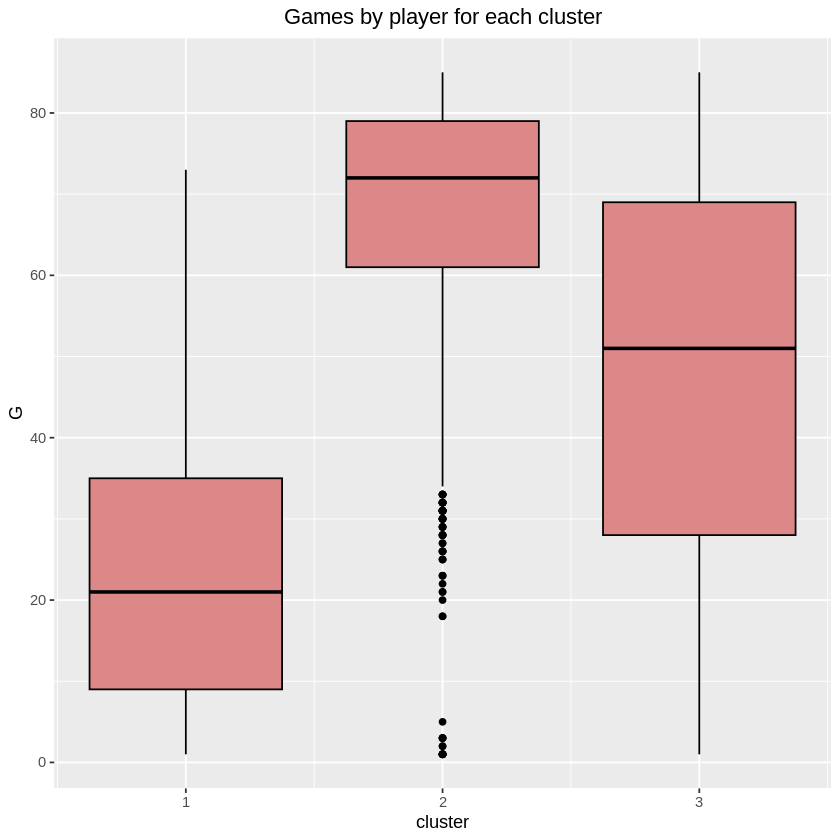

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = G, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Games by player for each cluster')

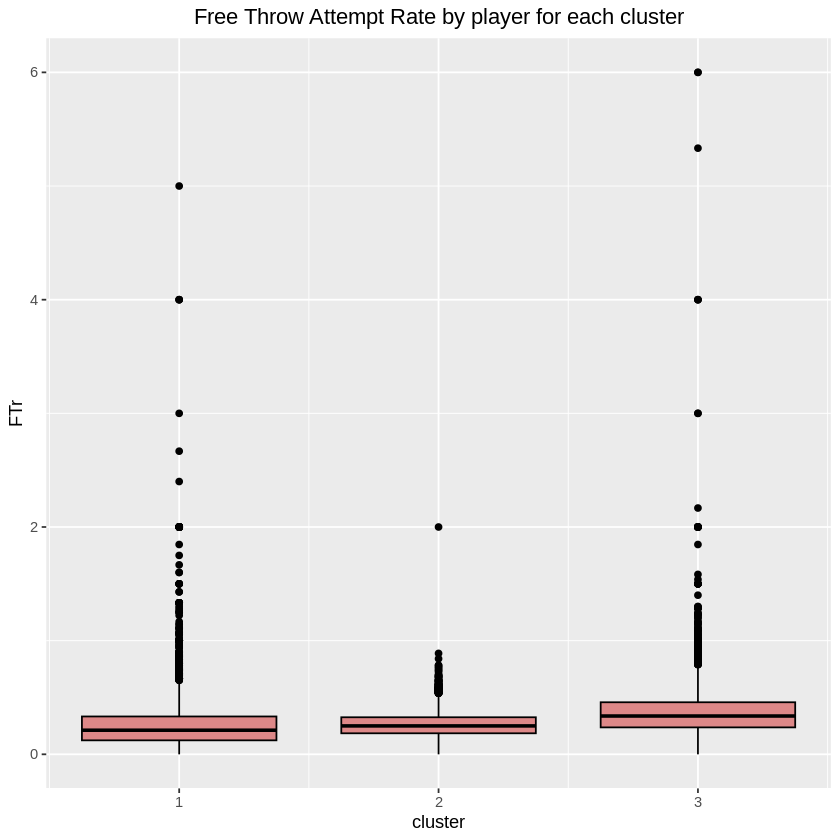

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = FTr, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Free Throw Attempt Rate by player for each cluster')

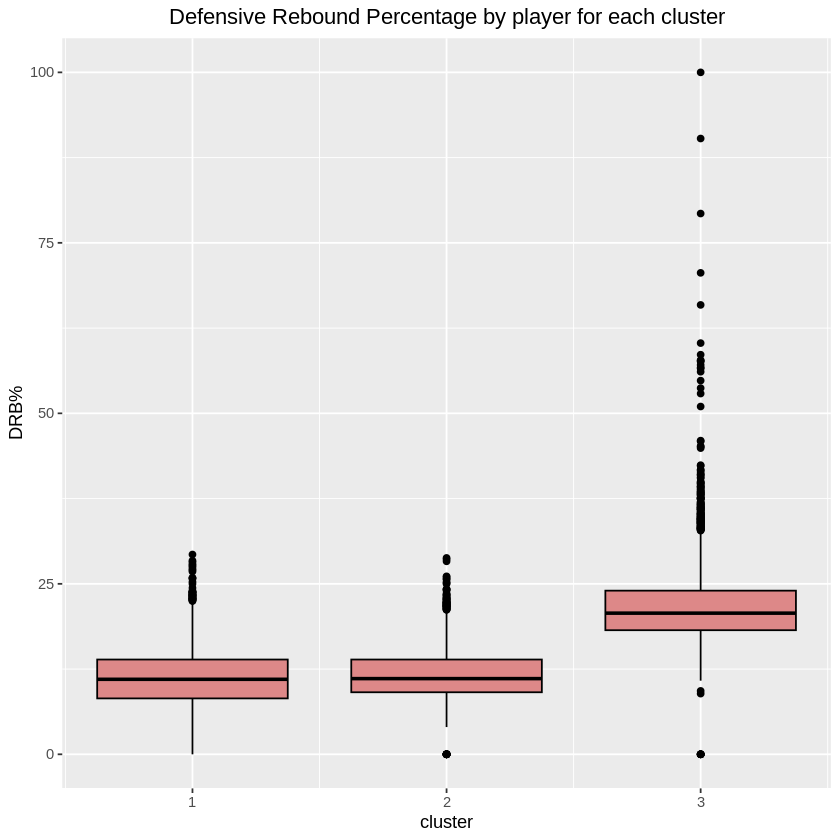

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `DRB%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Defensive Rebound Percentage by player for each cluster')

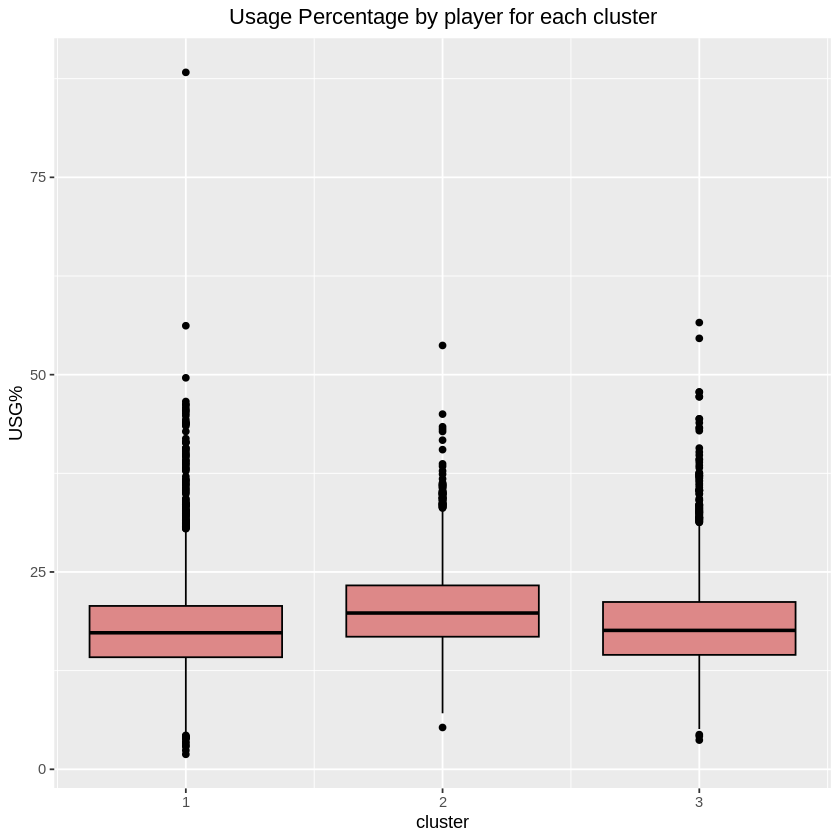

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `USG%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Usage Percentage by player for each cluster')

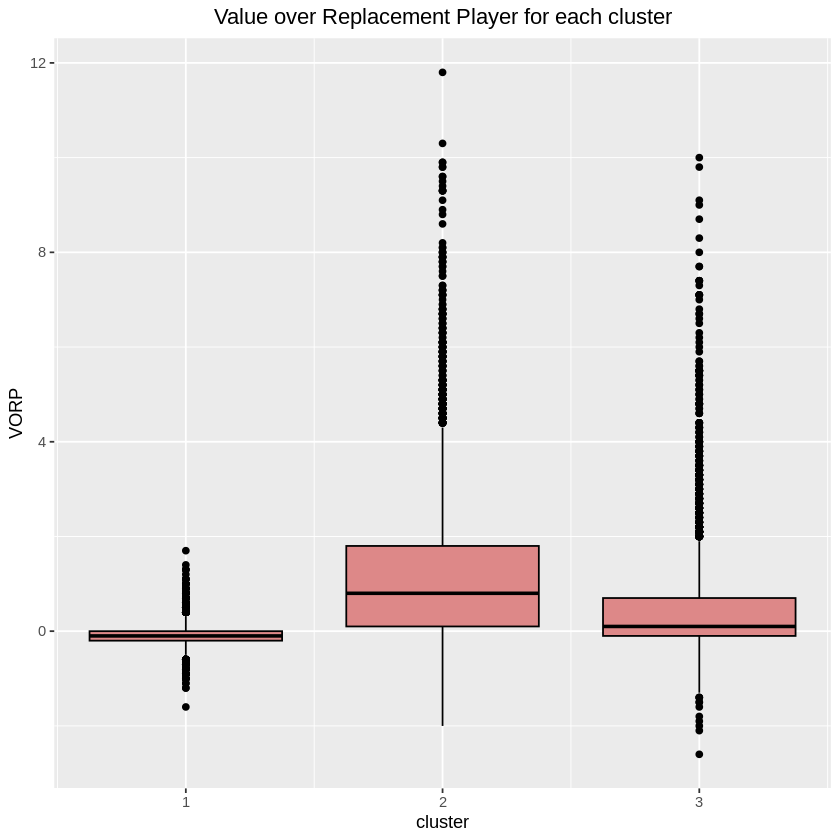

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = VORP, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Value over Replacement Player for each cluster')

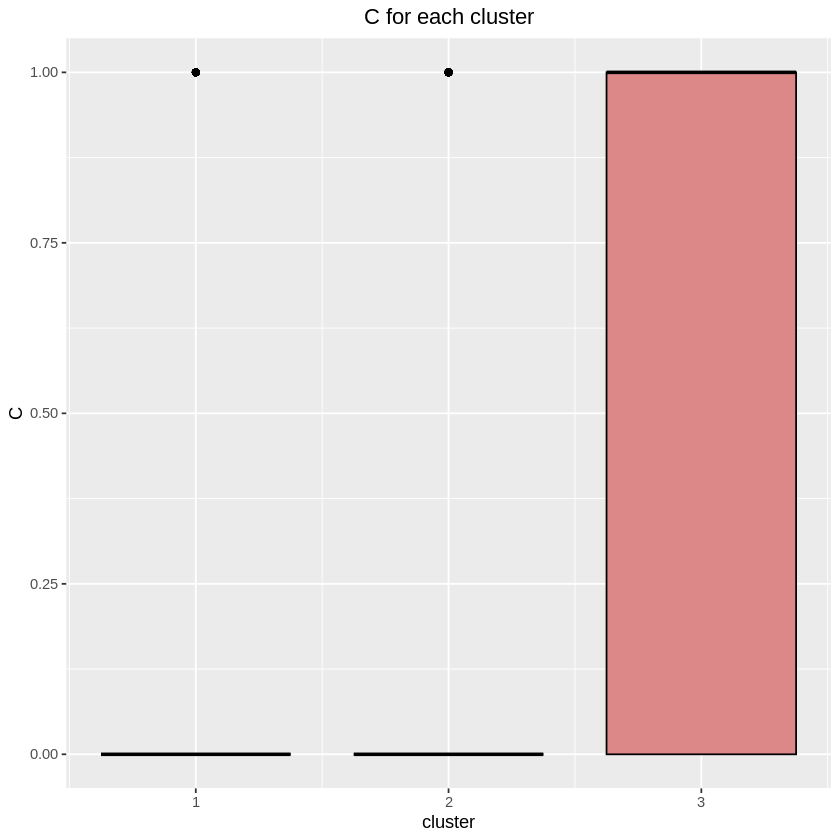

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = C, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('C for each cluster')

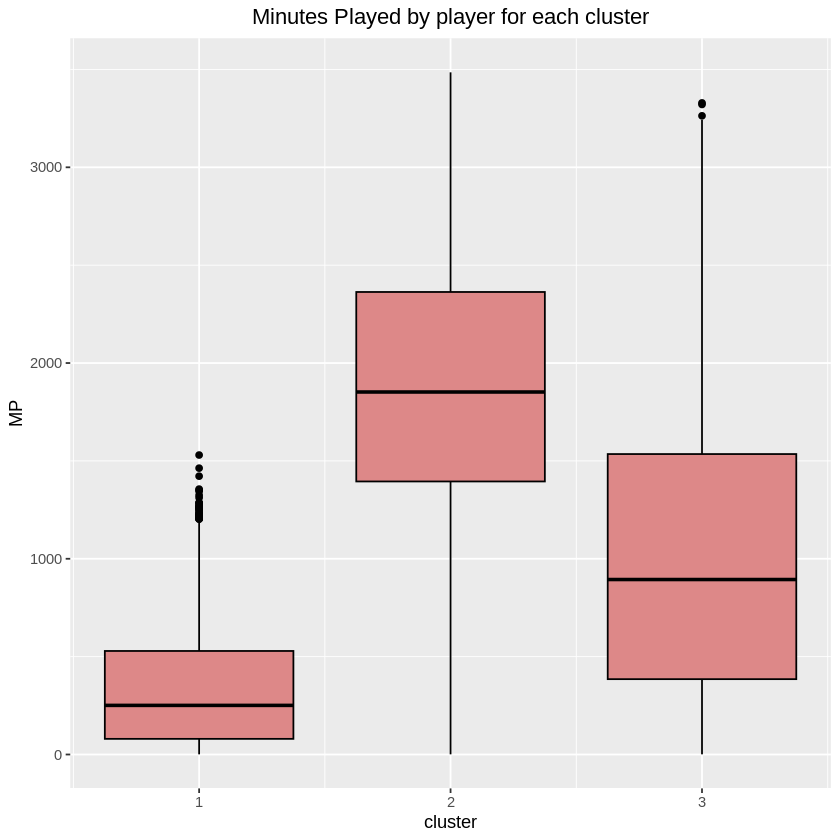

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = MP, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Minutes Played by player for each cluster')

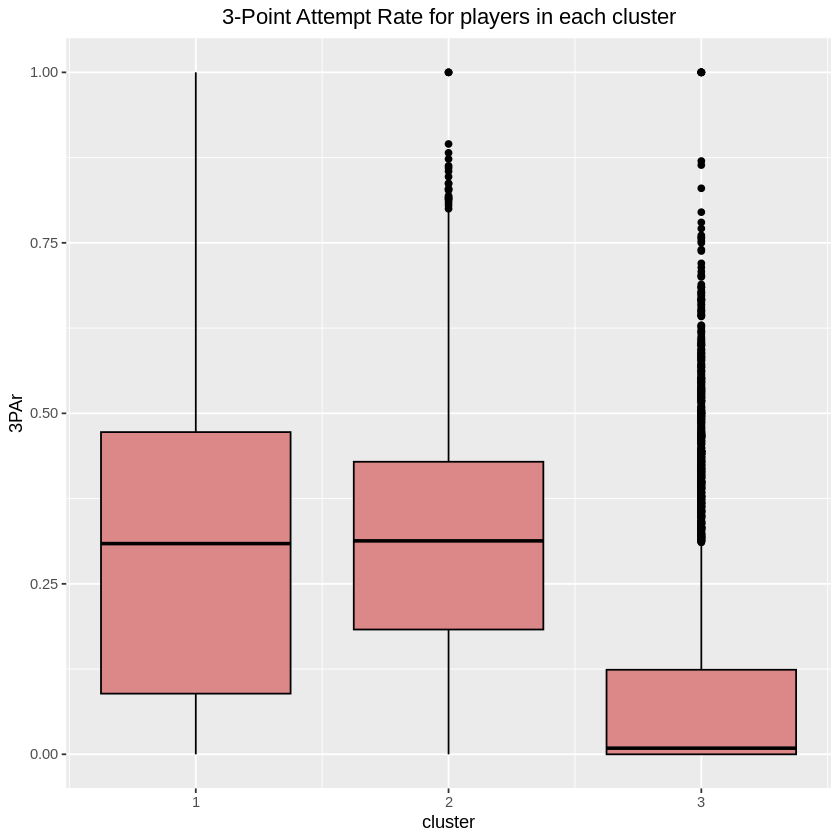

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `3PAr`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('3-Point Attempt Rate for players in each cluster')

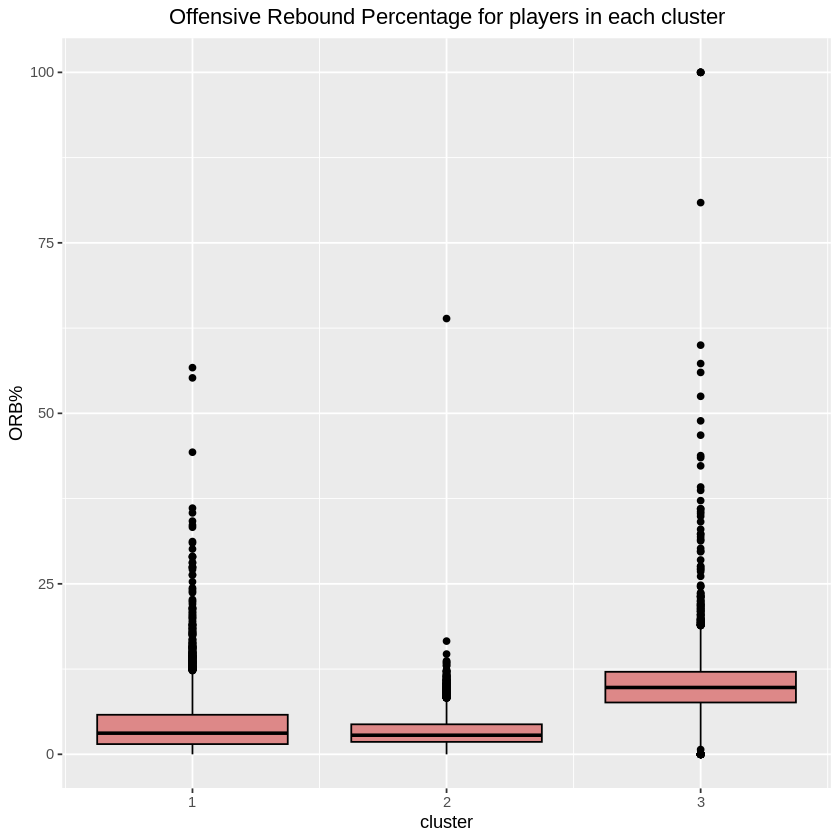

In [ ]:
#Bring the title to center:
theme_update(plot.title = element_text(hjust = 0.5))
#Show boxplots:
ggplot(Full_table_merged, aes(y = `ORB%`, x = cluster, group = cluster)) +
      geom_boxplot(colour="black", fill="#DD8888") +
      ggtitle('Offensive Rebound Percentage for players in each cluster')

#Description of the variables:

##Rk -- Rank

##Pos -- Position

##Age -- Player's age on February 1 of the season

##Tm -- Team

##G -- Games

##MP -- Minutes Played

##PER -- Player Efficiency Rating

A measure of per-minute production standardized such that the league average is 15.

##TS% -- True Shooting Percentage

A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.

##3PAr -- 3-Point Attempt Rate

Percentage of FG Attempts from 3-Point Range

##FTr -- Free Throw Attempt Rate

Number of FT Attempts Per FG Attempt

##ORB% -- Offensive Rebound Percentage

An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.

##DRB% -- Defensive Rebound Percentage

An estimate of the percentage of available defensive rebounds a player grabbed while they were on the floor.

##TRB% -- Total Rebound Percentage

An estimate of the percentage of available rebounds a player grabbed while they were on the floor.

##AST% -- Assist Percentage

An estimate of the percentage of teammate field goals a player assisted while they were on the floor.

##STL% -- Steal Percentage

An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.

##BLK% -- Block Percentage

An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.

##TOV% -- Turnover Percentage

An estimate of turnovers committed per 100 plays.

##USG% -- Usage Percentage

An estimate of the percentage of team plays used by a player while they were on the floor.

##OWS -- Offensive Win Shares

An estimate of the number of wins contributed by a player due to offense.

##DWS -- Defensive Win Shares

An estimate of the number of wins contributed by a player due to defense.

##WS -- Win Shares

An estimate of the number of wins contributed by a player.

##WS/48 -- Win Shares Per 48 Minutes

An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)

##OBPM -- Offensive Box Plus/Minus

A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, 
translated to an average team.

##DBPM -- Defensive Box Plus/Minus

A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.

##BPM -- Box Plus/Minus

A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.

##VORP -- Value over Replacement Player

A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.
